In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/breast-cancer-dataset/breast-cancer.csv


In [2]:
import seaborn as sns
%matplotlib inline 
import matplotlib.pyplot as plt # side-stepping mpl backend
import matplotlib.gridspec as gridspec # subplots
import mpld3 as mpl
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import cross_val_score

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Load data

In [3]:
df=pd.read_csv(r'/kaggle/input/breast-cancer-dataset/breast-cancer.csv')
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [4]:
df_copy=df.copy()

# Clean and Prepare data

In [5]:
df_copy.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [6]:
df_copy.drop('id', axis=1, inplace=True)
df_copy

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [7]:
df_copy.shape

(569, 31)

In [8]:
df_copy['diagnosis'].unique()

array(['M', 'B'], dtype=object)

In [9]:
df_copy['diagnosis']=df_copy['diagnosis'].map({'M':0, 'B':1})

In [10]:
df_copy.describe()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.627417,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,1.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


Text(0.5, 1.0, 'diagnosis(M=0, B=1)')

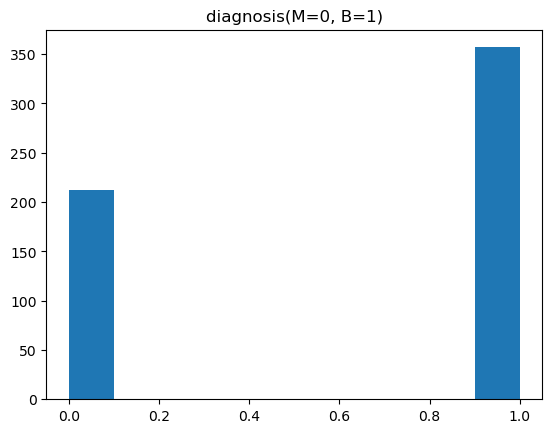

In [11]:
# df_copy.describe()
plt.hist(df_copy['diagnosis'])
plt.title('diagnosis(M=0, B=1)')

In [12]:
df_copy.corr()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,1.000000,-0.730029,-0.415185,-0.742636,-0.708984,-0.358560,-0.596534,-0.696360,-0.776614,-0.330499,...,-0.776454,-0.456903,-0.782914,-0.733825,-0.421465,-0.590998,-0.659610,-0.793566,-0.416294,-0.323872
radius_mean,-0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,-0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,-0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,-0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,-0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,-0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,-0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,-0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,-0.330499,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413


In [13]:
df_copy.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

# **KNN-**

In [14]:
##Let plot out just first 5 features-
# sns.pairplot(df_copy, hue='diagnosis', vars=['radius_mean', 'texture_mean', 'perimeter_mean',
#        'area_mean', 'smoothness_mean']);

In [15]:
X_df=df_copy.drop('diagnosis', axis=1)
y=df_copy['diagnosis']

In [16]:
scaler= MinMaxScaler()
X=scaler.fit_transform(X_df)
X

array([[0.52103744, 0.0226581 , 0.54598853, ..., 0.91202749, 0.59846245,
        0.41886396],
       [0.64314449, 0.27257355, 0.61578329, ..., 0.63917526, 0.23358959,
        0.22287813],
       [0.60149557, 0.3902604 , 0.59574321, ..., 0.83505155, 0.40370589,
        0.21343303],
       ...,
       [0.45525108, 0.62123774, 0.44578813, ..., 0.48728522, 0.12872068,
        0.1519087 ],
       [0.64456434, 0.66351031, 0.66553797, ..., 0.91065292, 0.49714173,
        0.45231536],
       [0.03686876, 0.50152181, 0.02853984, ..., 0.        , 0.25744136,
        0.10068215]])

In [17]:
y

0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    1
Name: diagnosis, Length: 569, dtype: int64

In [18]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.3, random_state=1)
print('X_train: ', X_train.shape)
print('X_test: ', X_test.shape)
print('y_train: ', y_train.shape)
print('y_test: ', y_test.shape)

X_train:  (398, 30)
X_test:  (171, 30)
y_train:  (398,)
y_test:  (171,)


In [19]:
model=KNeighborsClassifier()

In [20]:
#parameter distribution-
param_dist={'metric':['euclidean', 'minkowski', 'manhattan'],
           'n_neighbors':range(1,11)}

# **Hyparameter tuning-**
**RandomSearchCV-**

In [21]:
random_search=RandomizedSearchCV(model, param_distributions=param_dist, n_iter=10, cv=5)
random_search.fit(X_train,y_train)

RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(),
                   param_distributions={'metric': ['euclidean', 'minkowski',
                                                   'manhattan'],
                                        'n_neighbors': range(1, 11)})

In [22]:
print(random_search.best_estimator_)
print(random_search.best_score_)

KNeighborsClassifier(metric='manhattan', n_neighbors=4)
0.9723734177215191


In [23]:
y_pred_R=random_search.predict(X_test)

In [24]:
print('train_accuracy=', random_search.score(X_train, y_train),
'test_accuracy=', accuracy_score(y_test,y_pred_R))

train_accuracy= 0.9824120603015075 test_accuracy= 0.9532163742690059


**GridSearchCV-**

In [25]:
Grid_search=GridSearchCV(model, param_grid=param_dist, cv=5)
Grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'minkowski', 'manhattan'],
                         'n_neighbors': range(1, 11)})

In [26]:
Grid_search.best_estimator_

KNeighborsClassifier(metric='manhattan', n_neighbors=3)

In [27]:
Grid_search.best_score_

0.9749050632911394

In [28]:
y_pred_G=Grid_search.predict(X_test)

In [29]:
print('train_accuracy=',Grid_search.score(X_train, y_train),
     'test_accuracy=', accuracy_score(y_pred_G, y_test))

train_accuracy= 0.9874371859296482 test_accuracy= 0.9590643274853801


# SVM-

In [30]:
model_svm=SVC()
param={'C':range(1, 11),
      'kernel':['linear','poly', 'rbf', 'sigmoid']}

**Random_searchCV-**

In [31]:
random_model_cv=RandomizedSearchCV(model_svm, param_distributions=param, cv=5)
random_model_cv.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=SVC(),
                   param_distributions={'C': range(1, 11),
                                        'kernel': ['linear', 'poly', 'rbf',
                                                   'sigmoid']})

In [32]:
print(random_model_cv.best_estimator_,
     random_model_cv.best_score_)

SVC(C=5) 0.9799050632911392


In [33]:
y_pred_R=random_model_cv.predict(X_test)

In [34]:
print('train_score=', random_model_cv.score(X_train, y_train),
     'test_score=', accuracy_score(y_test, y_pred_R))

train_score= 0.9899497487437185 test_score= 0.9590643274853801


**Grid_SearchCV-**

In [35]:
Grid_search_CV=GridSearchCV(model_svm, param_grid=param, cv=5)
Grid_search_CV.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': range(1, 11),
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']})

In [36]:
print(Grid_search_CV.best_estimator_,
     Grid_search_CV.best_score_)

SVC(C=3) 0.9799050632911392


In [37]:
y_pred_G=Grid_search_CV.predict(X_test)

In [38]:
print('train_score=', Grid_search_CV.score(X_train, y_train),
     'test_score=',accuracy_score(y_test, y_pred_G))

train_score= 0.9899497487437185 test_score= 0.9532163742690059


# **K-Fold-**

In [39]:
from sklearn.model_selection import train_test_split,KFold

x1=KFold(n_splits=6, shuffle=False, random_state=None)

In [40]:
df_copy

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,0,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,0,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,0,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,0,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,0,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,0,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,0,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,0,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [41]:
# from sklearn.metrics import accuracy_score
# a=[]
# b=[]
# for i, (train_index, test_index) in enumerate(x1.split(X)):
#     train=df.iloc[train_index]
#     xtrain =train.iloc[:,1:]
#     ytrain =train.iloc[:,0]
#     test=df.iloc[test_index]
#     xtest=test.iloc[:, 1:]
#     ytest=test.iloc[:,0]
#     svc_model =SVC(kernel='poly')
#     svc_model.fit(xtrain,ytrain)
#     y_pre=svc_model.predict(xtest)
#     print((svc_model.score(xtrain,ytrain),accuracy_score(ytest, y_pre)))
#     a.append(svc_model.score(xtrain,ytrain))
#     b.append(accuracy_score(ytest, y_pre))
# print(np.mean(a))
# np.mean(b)    

In [42]:
    #kfold (cross_val_)
svc_model =SVC(kernel='poly')
svc_model.fit(X_train,y_train,)
x=cross_val_score(svc_model, X_train, y_train, cv=6)
print(np.mean(x))
                  

0.9749359264284637


# **Naive Bayes-**

In [43]:
GNB = GaussianNB()
GNB.fit(X_train,y_train)

GaussianNB()

In [44]:
y_pred_GNB = GNB.predict(X_test)

In [45]:
print('train_score=', GNB.score(X_train, y_train),
     'test_score=', accuracy_score(y_test, y_pred_GNB))

train_score= 0.9396984924623115 test_score= 0.935672514619883


# **Decision tree-**

In [46]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [47]:
param_dt = {"max_depth": range(3,6),
              "max_features": range(1,11),
              "min_samples_split": range(2,11),
              "criterion": ["gini", "entropy"]}

**RandomSearchCV-**

In [48]:
random_search_dt=RandomizedSearchCV(dt, param_distributions=param_dt, cv=5)
random_search_dt.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': range(3, 6),
                                        'max_features': range(1, 11),
                                        'min_samples_split': range(2, 11)})

In [49]:
print(random_search_dt.best_estimator_,
     random_search_dt.best_score_)

DecisionTreeClassifier(max_depth=3, max_features=8, min_samples_split=7) 0.949746835443038


In [50]:
y_pred_dt=random_search_dt.predict(X_test)

In [51]:
print('train_score=', random_search_dt.score(X_train, y_train),
     'test_score=', accuracy_score(y_test, y_pred_dt))

train_score= 0.9673366834170855 test_score= 0.9005847953216374


**GridSearchCV-**

In [52]:
grid_search_dt=GridSearchCV(dt, param_grid=param_dt, cv=5)
grid_search_dt.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(3, 6), 'max_features': range(1, 11),
                         'min_samples_split': range(2, 11)})

In [53]:
print(grid_search_dt.best_estimator_,
     grid_search_dt.best_score_)

DecisionTreeClassifier(criterion='entropy', max_depth=4, max_features=7,
                       min_samples_split=8) 0.9623417721518986


In [54]:
y_pred_dtG=grid_search_dt.predict(X_test)

In [55]:
print('train_score=', grid_search_dt.score(X_train, y_train),
     'test_score=', accuracy_score(y_test, y_pred_dtG))

train_score= 0.9748743718592965 test_score= 0.9122807017543859


In [56]:
data={' ':['KNN', 'SVM', 'DT', 'NB'],'Random_Train':[random_search.score(X_train, y_train), random_model_cv.score(X_train, y_train), random_search_dt.score(X_train, y_train), 'Nan'], 'Randon_Test':[accuracy_score(y_test, y_pred_R), accuracy_score(y_test, y_pred_R), accuracy_score(y_test, y_pred_dt), 'Nan'], 'Grid_Train':[Grid_search.score(X_train, y_train), Grid_search_CV.score(X_train, y_train), grid_search_dt.score(X_train, y_train), 'Nan'], 'Grid_Test':[accuracy_score(y_test, y_pred_G), accuracy_score(y_test, y_pred_G), accuracy_score(y_test, y_pred_dtG), 'Nan'], 'Train':['Nan', 'Nan', 'Nan', GNB.score(X_train, y_train)], 'Test':['Nan', 'Nan', 'Nan', accuracy_score(y_test, y_pred_GNB)]}

In [57]:
df=pd.DataFrame(data)
df.set_index(' ', inplace=True)
df

,Random_Train,Randon_Test,Grid_Train,Grid_Test,Train,Test
,,,,,,
KNN,0.982412,0.959064,0.987437,0.953216,Nan,Nan
SVM,0.98995,0.959064,0.98995,0.953216,Nan,Nan
DT,0.967337,0.900585,0.974874,0.912281,Nan,Nan
NB,Nan,Nan,Nan,Nan,0.939698,0.935673


# **RFC-**

In [58]:
from sklearn.ensemble import RandomForestClassifier

In [59]:
model = RandomForestClassifier(100)

In [60]:
model.fit(X_train, y_train)

RandomForestClassifier()

In [61]:
model.score(X_train, y_train), model.score(X_test, y_test)

(1.0, 0.9415204678362573)

In [62]:
model.feature_importances_

array([0.05261955, 0.01734502, 0.06629179, 0.03763356, 0.00415512,
       0.00907234, 0.05385235, 0.10164425, 0.00403614, 0.0048529 ,
       0.0078125 , 0.00472457, 0.02095543, 0.02482119, 0.00335384,
       0.00307809, 0.00487668, 0.00846839, 0.00268384, 0.00579736,
       0.07952004, 0.01620495, 0.20397372, 0.10620813, 0.00944583,
       0.01468232, 0.03430438, 0.08285616, 0.00873846, 0.00599109])

In [63]:
fea_imp=pd.DataFrame({'importance': model.feature_importances_}, index= X_df.columns).sort_values('importance')
fea_imp

,importance
symmetry_se,0.002684
compactness_se,0.003078
smoothness_se,0.003354
symmetry_mean,0.004036
smoothness_mean,0.004155
texture_se,0.004725
fractal_dimension_mean,0.004853
concavity_se,0.004877
fractal_dimension_se,0.005797
fractal_dimension_worst,0.005991


<Axes: >

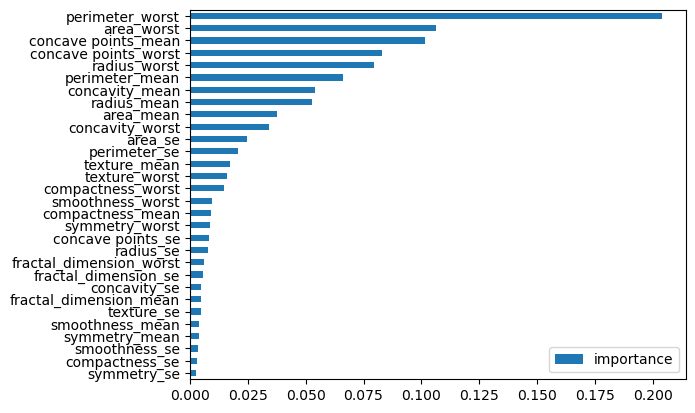

In [64]:
fea_imp.plot.barh()

In [65]:
X_imp_col=fea_imp[fea_imp['importance']>0.05]
X_imp_col

,importance
radius_mean,0.052620
concavity_mean,0.053852
perimeter_mean,0.066292
radius_worst,0.079520
concave points_worst,0.082856
concave points_mean,0.101644
area_worst,0.106208
perimeter_worst,0.203974


In [66]:
X_imp=X_df[X_imp_col.index]
X_imp

,radius_mean,concavity_mean,perimeter_mean,radius_worst,concave points_worst,concave points_mean,area_worst,perimeter_worst
0,17.99,0.30010,122.80,25.380,0.2654,0.14710,2019.0,184.60
1,20.57,0.08690,132.90,24.990,0.1860,0.07017,1956.0,158.80
2,19.69,0.19740,130.00,23.570,0.2430,0.12790,1709.0,152.50
3,11.42,0.24140,77.58,14.910,0.2575,0.10520,567.7,98.87
4,20.29,0.19800,135.10,22.540,0.1625,0.10430,1575.0,152.20
...,...,...,...,...,...,...,...,...
564,21.56,0.24390,142.00,25.450,0.2216,0.13890,2027.0,166.10
565,20.13,0.14400,131.20,23.690,0.1628,0.09791,1731.0,155.00
566,16.60,0.09251,108.30,18.980,0.1418,0.05302,1124.0,126.70
567,20.60,0.35140,140.10,25.740,0.2650,0.15200,1821.0,184.60


In [67]:
X_imp_tr, X_imp_ts, y_train, y_test=train_test_split(X_imp, y, test_size=0.2)

In [68]:
model.fit(X_imp_tr, y_train)

RandomForestClassifier()

In [69]:
model.score(X_imp_tr, y_train), model.score(X_imp_ts, y_test)

(1.0, 0.9649122807017544)